1. Loading the Dataset

In [2]:
import pandas as pd

# Load the dataset
file_path = 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

2. Text Preprocessing
Preprocess the reviews.text column:

Converting text to lowercase.
Removeing special characters and numbers.
Tokenize and remove stopwords.

In [6]:
import re

# Simple stopwords list
stopwords = {'the', 'and', 'is', 'in', 'to', 'of', 'it', 'on', 'a', 'this', 'that', 'was', 'with', 'as', 'for', 'its', 'at', 'an'}

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stopwords]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing
data['cleaned_reviews'] = data['reviews.text'].astype(str).apply(preprocess_text)

# Preview the cleaned data
print(data[['reviews.text', 'cleaned_reviews']].head())


                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                     cleaned_reviews  
0  i thought would be big small paper but turn ou...  
1             kindle light easy use especially beach  
2  didnt know how much id use kindle so went lowe...  
3  i am happy my purchase i caught sale really go...  
4  solid entry level kindle great kids gifted kid...  


3. Generating Word Cloud
Visualize the most frequent words in the reviews.



In [18]:
#!pip install wordcloud

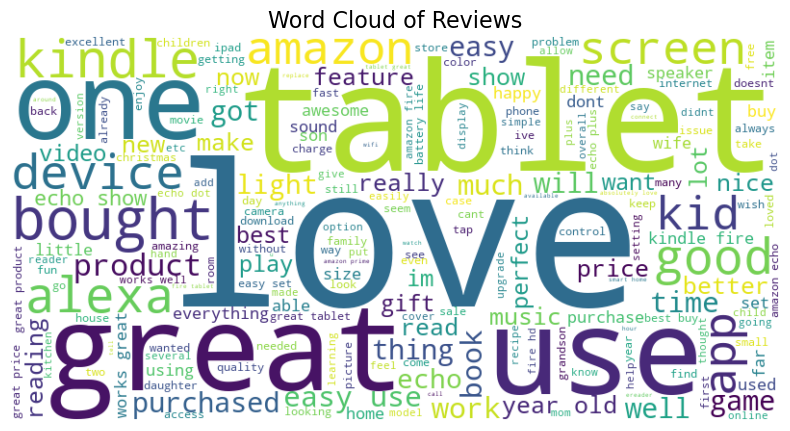

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned reviews
text_data = ' '.join(data['cleaned_reviews'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews', fontsize=16)
plt.show()


4. N-Gram Frequency Plot
Count and visualize the most common unigrams, bigrams, or trigrams.

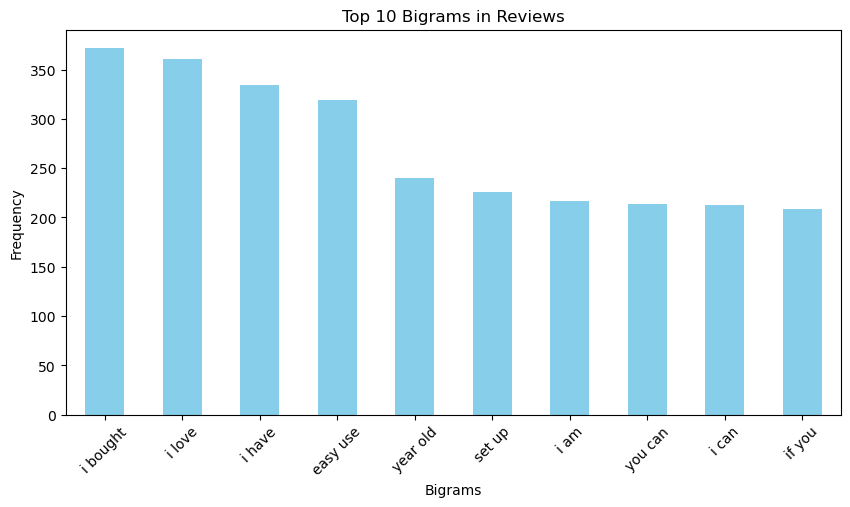

In [23]:
from collections import Counter

def get_ngrams(text, n=1):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

# Extract unigrams, bigrams, or trigrams
unigrams = Counter([word for review in data['cleaned_reviews'] for word in get_ngrams(review, 1)])
bigrams = Counter([ngram for review in data['cleaned_reviews'] for ngram in get_ngrams(review, 2)])

# Plot most common bigrams
bigram_counts = bigrams.most_common(10)
bigram_df = pd.DataFrame(bigram_counts, columns=['Bigram', 'Frequency'])

bigram_df.plot(kind='bar', x='Bigram', y='Frequency', legend=False, figsize=(10, 5), color='skyblue')
plt.title('Top 10 Bigrams in Reviews')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


5. Sentiment Analysis
If you have sentiment labels (like reviews.rating), analyze sentiment distribution.

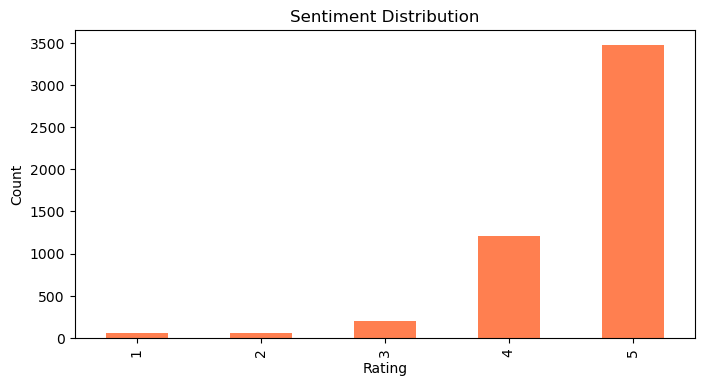

In [28]:
# Plot sentiment distribution
data['reviews.rating'].value_counts().sort_index().plot(kind='bar', color='coral', figsize=(8, 4))
plt.title('Sentiment Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


6. Text Vectorization
Convert text into numerical features using techniques like TF-IDF or Bag of Words.

Using TF-IDF:

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features

# Fit and transform the cleaned reviews
tfidf_matrix = tfidf.fit_transform(data['cleaned_reviews'])

# Convert to a DataFrame for inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())


   ability  able  about  absolutely  access  account  actually  add  added  \
0      0.0   0.0    0.0         0.0     0.0      0.0       0.0  0.0    0.0   
1      0.0   0.0    0.0         0.0     0.0      0.0       0.0  0.0    0.0   
2      0.0   0.0    0.0         0.0     0.0      0.0       0.0  0.0    0.0   
3      0.0   0.0    0.0         0.0     0.0      0.0       0.0  0.0    0.0   
4      0.0   0.0    0.0         0.0     0.0      0.0       0.0  0.0    0.0   

   adding  ...  years  yes  yet  you  youll  young  your  youre  youtube   yr  
0     0.0  ...    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0      0.0  0.0  
1     0.0  ...    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0      0.0  0.0  
2     0.0  ...    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0      0.0  0.0  
3     0.0  ...    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0      0.0  0.0  
4     0.0  ...    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0      0.0  0.0  

[5 rows x 1000 columns]


7. Key Features for Modeling
Select features like:

TF-IDF vectors for textual representation.
reviews.rating as a target variable

In [34]:
# Features and target
X = tfidf_matrix
y = data['reviews.rating']  # Use this for supervised tasks like classification


Insights Example:

In [39]:
# Key terms in positive and negative reviews
positive_reviews = data[data['reviews.rating'] > 3]['cleaned_reviews']
negative_reviews = data[data['reviews.rating'] <= 3]['cleaned_reviews']

positive_words = ' '.join(positive_reviews)
negative_words = ' '.join(negative_reviews)

# Generate word clouds
WordCloud(background_color='white').generate(positive_words).to_image().show()
WordCloud(background_color='white').generate(negative_words).to_image().show()


Embeddings Example:

In [42]:
from gensim.models import Word2Vec

# Tokenize the cleaned reviews
tokenized_reviews = data['cleaned_reviews'].apply(lambda x: x.split())

# Train a Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)

# Example: Get embedding for a word
print(w2v_model.wv['kindle'])


[ 0.0872126   0.23589982 -0.03136984 -0.1427483   0.32897952 -0.7892132
  0.36927485  0.97850317 -0.4083252  -0.22447427 -0.34194076 -0.5171475
 -0.13472033  0.26188815  0.31485566 -0.3139275   0.01827939 -0.22051355
  0.04374504 -0.7013978   0.56608295 -0.18007098 -0.17554905 -0.5521573
 -0.12549     0.21898338 -0.3405491  -0.50658023 -0.23368551  0.04918082
  0.686653   -0.07064442  0.01969997 -0.08933372 -0.31910837  0.60085744
  0.43844497 -0.28548595 -0.1019275  -0.87432724 -0.14858419 -0.30744466
 -0.15543519 -0.12906408  0.30137348 -0.30309293 -0.46388948 -0.21214318
  0.34790635  0.37761107  0.1845676  -0.69120437  0.2518015   0.06239172
  0.12994531  0.05269038  0.35422382 -0.23439977 -0.5941256   0.15527649
  0.08167055  0.07318852  0.3691438  -0.39397624 -0.49044758  0.72768015
  0.23919876  0.05582669 -0.6068661   0.5804222  -0.33982265  0.01972587
  0.5312805  -0.21609932  0.54098594  0.07739887  0.2266963  -0.06495968
 -0.41891584 -0.1185676  -0.33001927  0.20278472 -0.17